In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('adel.xlsx', sheet_name=1, index_col=0)

In [3]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25
ID,,,,,,,,,,,,,,,,,,,,,
1,43,4205,20,210.25,97.79,3442.75,40.08,1.19,21,43,...,269.87,60.66,19.83,172.13,4.003023,1.00,98.0,100.0,8,6.722689
2,143,5344,26,205.54,37.37,2420.70,76.96,2.30,35,72,...,221.73,58.26,23.83,93.10,0.651049,0.96,86.4,97.9,9,3.910000
3,77,4760,24,198.33,61.82,2727.50,39.62,2.36,36,68,...,256.38,55.42,23.92,113.64,1.475844,1.17,91.7,100.0,16,6.780000
4,723,24186,49,493.59,33.45,7241.18,273.80,3.77,77,129,...,349.13,87.00,45.40,147.77,0.204385,0.73,55.8,69.6,24,6.370000
5,238,9549,39,244.85,40.12,3592.97,86.61,4.10,55,94,...,225.29,66.68,28.20,92.12,0.387059,0.74,78.2,94.1,18,4.390000


In [3]:
def get_correlation_indices(df, threshold):
    """
    Returns the indices where the Pearson correlation coefficients are
    above the given threshold in the given dataframe.
    """
    pearsonr = np.corrcoef(df, rowvar=False)
    indices = np.where(pearsonr.reshape(len(df.columns) ** 2) > threshold)[0]
    
    # The two conditions here make sure we do not include diagonal elements
    # (trivial), and that we include each pair only once.
    indices_2d = [[x // 25, x % 25] for x in indices if x // 25 != x % 25 and x // 25 < x % 25]
    
    # Display the correlations in a matrix to make it look easier
    index = 0
    
    correlation = np.zeros((len(df.columns), len(df.columns)))

    for i in range(25):
        count = 0
        print('v' + ('0' + str(i+1))[-2:], end=': ')
        for j in range(25):
            if index < len(indices_2d) and i == indices_2d[index][0] \
                and j == indices_2d[index][1] and i < j:
                print('*', end=' ')
                correlation[i][j] = 1
                index += 1
                count += 1
            elif i > j:
                print(' ', end=' ')
            else:
                print('-', end=' ')
        print(' ', count)
    
    return indices_2d, correlation

In [5]:
np.array(df)[indices_2d[0][0]][indices_2d[0][1]]

NameError: name 'indices_2d' is not defined

In [5]:
df.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25'],
      dtype='object')

In [8]:
indices, correlation = get_correlation_indices(df, 0.8)

v01: - - - - - - * - - - - - - - - - - - - - - - - - -   1
v02:   - - * - * - - * * - - - * - * - * * - - - - * -   9
v03:     - - - - - - - - - - - - - - - - - - - - - - -   0
v04:       - - * - - * * * - * * * * * - * - - - - * *   12
v05:         - - - - - - - - - - - - * - - - - - - - -   1
v06:           - - - * * - - * * - * * * * - - - - - *   9
v07:             - - - - - - - - - - - - - - - - - - -   0
v08:               - - - - - - - - - - - - - - - - - -   0
v09:                 - * * * * * * * * * - - - - - - -   9
v10:                   - * * * * * * * * * - - - - - -   9
v11:                     - - * * * * * * - - - - - - -   6
v12:                       - * - - * - * - - - - - - -   3
v13:                         - - * * * * * - - - - - -   5
v14:                           - * * * - - - - - - * -   4
v15:                             - * * * - - - - - - -   3
v16:                               - * * * - - - - * *   5
v17:                                 - * * - - - - * - 

In [7]:
indices[:5]

[[0, 6], [1, 3], [1, 5], [1, 8], [1, 9]]

## Use above for OLS model

In [4]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [5]:
def fit_and_display(output, inputs, constant=True, display=True):
    """
    Fits an OLS model with the given output and inputs and shows the
    result summary.
    
    Args:
        output: int, the DV
        inputs: list of int, the IVs. Both args are 1-based indexed.
    """
    Y = df['v' + str(output)]
    X = df[['v' + str(x) for x in inputs]]
    
    if constant:
        X = sm.add_constant(X)
    
    model = sm.OLS(Y, X)
    results = model.fit()
    
    if display:
        print(results.summary())
        
    return results

In [10]:
# Since v4 has the most correlations, may be a good candidate for a DV
fit_and_display(4, [6, 9, 11, 13, 14, 17, 19, 24, 25], False)

                            OLS Regression Results                            
Dep. Variable:                     v4   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2429.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:31:37   Log-Likelihood:                -2143.2
No. Observations:                 618   AIC:                             4304.
Df Residuals:                     609   BIC:                             4344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v6            -0.0065      0.002     -2.775      0.0

In [11]:
Y = df['v4']
X = df[['v' + str(x) for x in [6, 9, 11, 13, 14, 17, 19, 24, 25]]]

In [12]:
print(Y.shape)
print(X.shape)

(618,)
(618, 9)


/usr/local/lib64/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


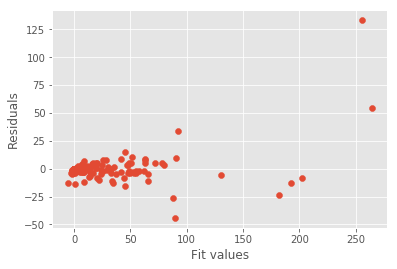

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
model = sm.OLS(Y_train, X_train)
result = model.fit()

predictions = result.predict(X_test)

plt.ylabel('Residuals')
plt.xlabel('Fit values')
residuals = predictions - Y_test
plt.scatter(predictions, residuals);

In [14]:
np.corrcoef(predictions, residuals)

array([[1.        , 0.40037226],
       [0.40037226, 1.        ]])

In [15]:
summary = result.summary()

In [16]:
np.where(np.array(result.pvalues) < 0.05)[0] + 1

array([2, 4, 6, 7, 8, 9])

## Now the same for v2

In [6]:
from IPython.display import display, Markdown

In [7]:
v2_corr = correlation[1]

NameError: name 'correlation' is not defined

In [38]:
v2_corr

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0.])

In [42]:
ivs = np.where(v2_corr == 1)[0]

In [43]:
ivs

array([ 3,  5,  8,  9, 13, 15, 17, 18, 23])

In [44]:
ivs += 1

In [45]:
ivs

array([ 4,  6,  9, 10, 14, 16, 18, 19, 24])

In [88]:
# List of IVs to consider
considered_ivs = []

# Print header
printed = 'Expt. No.|DV |IVs | Adj. R^2|Significant IVs\n---|:---:|:---:|:---:|---\n'
expt_no = 1

for i in range(len(ivs)):    
    # First with constant
    printed += str(expt_no) + '|'
    expt_no += 1
    
    considered_ivs.append(ivs[i])
    result = fit_and_display(2, considered_ivs, display=False)
    
    # For printing
    print_ivs = ['v' + str(x) for x in considered_ivs]
    
    # Get metrics
    adj_r2 = result.rsquared_adj
    adj_r2 = int(adj_r2 * 1000) / 1000
    pvalues = np.array(result.pvalues)
    
    # Add result to Markdown table
    if np.all(pvalues < 0.05):
        printed += ('v2 |' + ','.join(print_ivs) + '|' + str(adj_r2) + '|All\n')
    else:
        significant = np.where(pvalues < 0.05)[0]
        printed += ('v2 |' + ','.join(print_ivs) + '|' + str(adj_r2) + '|' + ','.join(['v' + str(ivs[x]) for x in significant]) + '\n')
    
    # Next without constant
    printed += str(expt_no) + '|'
    expt_no += 1
    
    result = fit_and_display(2, considered_ivs, constant=False, display=False)
    adj_r2 = result.rsquared_adj
    adj_r2 = int(adj_r2 * 1000) / 1000
    pvalues = np.array(result.pvalues)
    
    if np.all(pvalues < 0.05):
        printed += ('v2 |' + ','.join(print_ivs) + ' (no const)|' + str(adj_r2) + '|All\n')
    else:
        significant = np.where(pvalues < 0.05)[0]
        printed += ('v2 |' + ','.join(print_ivs) + ' (no const)|' + str(adj_r2) + '|' + ','.join(['v' + str(ivs[x]) for x in significant]) + '\n')
    
display(Markdown(printed))

Expt. No.|DV |IVs | Adj. R^2|Significant IVs
---|:---:|:---:|:---:|---
1|v2 |v4|0.804|All
2|v2 |v4 (no const)|0.818|All
3|v2 |v4,v6|0.924|All
4|v2 |v4,v6 (no const)|0.93|All
5|v2 |v4,v6,v9|0.924|v4,v6,v9
6|v2 |v4,v6,v9 (no const)|0.93|All
7|v2 |v4,v6,v9,v10|0.925|All
8|v2 |v4,v6,v9,v10 (no const)|0.931|v4,v6,v10
9|v2 |v4,v6,v9,v10,v14|0.933|All
10|v2 |v4,v6,v9,v10,v14 (no const)|0.939|All
11|v2 |v4,v6,v9,v10,v14,v16|0.981|v6,v9,v10,v14,v16,v18
12|v2 |v4,v6,v9,v10,v14,v16 (no const)|0.983|All
13|v2 |v4,v6,v9,v10,v14,v16,v18|0.981|v6,v9,v10,v14,v16,v18
14|v2 |v4,v6,v9,v10,v14,v16,v18 (no const)|0.983|v4,v6,v9,v10,v14,v16
15|v2 |v4,v6,v9,v10,v14,v16,v18,v19|0.992|All
16|v2 |v4,v6,v9,v10,v14,v16,v18,v19 (no const)|0.993|v4,v6,v10,v14,v16,v18,v19
17|v2 |v4,v6,v9,v10,v14,v16,v18,v19,v24|0.992|All
18|v2 |v4,v6,v9,v10,v14,v16,v18,v19,v24 (no const)|0.993|v4,v6,v10,v14,v16,v18,v19,v24


From this table, we use the results of row 16, since it has the highest R^2 with the least number of predictor variables.

In [84]:
results = fit_and_display(2, [4, 6, 10, 14, 16, 18, 19], constant=False)

                            OLS Regression Results                            
Dep. Variable:                     v2   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.255e+04
Date:                Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:18:18   Log-Likelihood:                -3849.7
No. Observations:                 618   AIC:                             7713.
Df Residuals:                     611   BIC:                             7744.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v4            17.9865      0.539     33.391      0.0

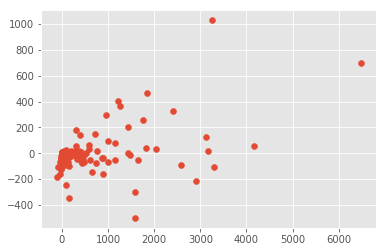

In [85]:
Y = df['v2']
X = df[['v' + str(x) for x in [4, 6, 10, 14, 16, 18, 19]]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model = sm.OLS(Y_train, X_train)
result = model.fit()

predictions = result.predict(X_test)
residuals = predictions - Y_test
plt.scatter(predictions, residuals);

In [86]:
np.corrcoef(predictions, residuals)

array([[1.        , 0.44426586],
       [0.44426586, 1.        ]])

## Creating a function to automatically do the above

In [15]:
def print_regression_experiments(output):
    """
    Performs regression by adding variables one by one, with and without the
    constant, and prints a tabular version of the results.
    
    Args:
        output: The output variable
    """
    var_corr = correlation[output - 1]  # Because output is 1-based indexed
    
    # Get correlated IVs
    ivs = np.where(var_corr == 1)[0]
    
    # Convert to 1-based indexing
    ivs += 1
    
    # List of IVs to consider
    considered_ivs = []

    # Print header
    printed = 'Expt. No.|DV |IVs | Adj. R^2|Significant IVs\n---|:---:|:---:|:---:|---\n'
    expt_no = 1

    for i in range(len(ivs)):    
        # First with constant
        printed += str(expt_no) + '|'
        expt_no += 1

        considered_ivs.append(ivs[i])
        result = fit_and_display(output, considered_ivs, display=False)

        # For printing
        print_ivs = ['v' + str(x) for x in considered_ivs]

        # Get metrics
        adj_r2 = result.rsquared_adj
        adj_r2 = int(adj_r2 * 1000) / 1000  # Want only 3 decimal places
        pvalues = np.array(result.pvalues)

        # Add result to Markdown table
        if np.all(pvalues < 0.05):
            printed += ('v' + str(output) + ' |' + ','.join(print_ivs) + '|' + str(adj_r2) + '|All\n')
        else:
            significant = np.where(pvalues < 0.05)[0]
            # [x-1] index is required because here, the constant is the first index.
            printed += ('v' + str(output) + ' |' + ','.join(print_ivs) + '|' + 
                        str(adj_r2) + '|' + ','.join(['v' + str(ivs[x - 1]) for x in significant]) + '\n')

        # Next without constant
        printed += str(expt_no) + '|'
        expt_no += 1

        result = fit_and_display(output, considered_ivs, constant=False, display=False)
        adj_r2 = result.rsquared_adj
        adj_r2 = int(adj_r2 * 1000) / 1000
        pvalues = np.array(result.pvalues)

        if np.all(pvalues < 0.05):
            printed += ('v' + str(output) + ' |' + ','.join(print_ivs) + ' (no const)|' + str(adj_r2) + '|All\n')
        else:
            significant = np.where(pvalues < 0.05)[0]
            printed += ('v' + str(output) + ' |' + ','.join(print_ivs) + ' (no const)|' + str(adj_r2) + '|' + 
                        ','.join(['v' + str(ivs[x]) for x in significant]) + '\n')

    # Print the Markdown
    display(Markdown(printed))

In [19]:
print_regression_experiments(6)

Expt. No.|DV |IVs | Adj. R^2|Significant IVs
---|:---:|:---:|:---:|---
1|v6 |v9|0.724|All
2|v6 |v9 (no const)|0.69|All
3|v6 |v9,v10|0.728|All
4|v6 |v9,v10 (no const)|0.693|All
5|v6 |v9,v10,v13|0.733|All
6|v6 |v9,v10,v13 (no const)|0.692|v9,v10
7|v6 |v9,v10,v13,v14|0.795|All
8|v6 |v9,v10,v13,v14 (no const)|0.791|All
9|v6 |v9,v10,v13,v14,v16|0.875|v25,v9,v13,v14,v16
10|v6 |v9,v10,v13,v14,v16 (no const)|0.883|v9,v13,v14,v16
11|v6 |v9,v10,v13,v14,v16,v17|0.875|v25,v9,v13,v14,v16
12|v6 |v9,v10,v13,v14,v16,v17 (no const)|0.884|v9,v13,v14,v16
13|v6 |v9,v10,v13,v14,v16,v17,v18|0.887|v25,v9,v13,v16,v17,v18
14|v6 |v9,v10,v13,v14,v16,v17,v18 (no const)|0.893|v9,v13,v14,v16,v17,v18
15|v6 |v9,v10,v13,v14,v16,v17,v18,v19|0.907|v25,v9,v13,v16,v18,v19
16|v6 |v9,v10,v13,v14,v16,v17,v18,v19 (no const)|0.913|v10,v13,v16,v17,v18,v19
17|v6 |v9,v10,v13,v14,v16,v17,v18,v19,v25|0.907|v25,v9,v13,v16,v18,v19,v25
18|v6 |v9,v10,v13,v14,v16,v17,v18,v19,v25 (no const)|0.914|v10,v13,v16,v17,v18,v19,v25


We'll consider #16 because we can throw away 0.001 R^2 for a simpler model.

In [18]:
results = fit_and_display(6, [10, 13, 16, 17, 18, 19], constant=False)

                            OLS Regression Results                            
Dep. Variable:                     v6   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1078.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          1.73e-321
Time:                        19:22:27   Log-Likelihood:                -4003.3
No. Observations:                 618   AIC:                             8019.
Df Residuals:                     612   BIC:                             8045.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v10           18.4844      2.768      6.677      0.0

## v9

In [20]:
print_regression_experiments(9)

Expt. No.|DV |IVs | Adj. R^2|Significant IVs
---|:---:|:---:|:---:|---
1|v9 |v10|0.94|All
2|v9 |v10 (no const)|0.966|All
3|v9 |v10,v11|0.945|v10,v11
4|v9 |v10,v11 (no const)|0.969|All
5|v9 |v10,v11,v12|0.954|All
6|v9 |v10,v11,v12 (no const)|0.974|All
7|v9 |v10,v11,v12,v13|0.956|v18,v10,v11,v13
8|v9 |v10,v11,v12,v13 (no const)|0.975|v10,v11,v13
9|v9 |v10,v11,v12,v13,v14|0.957|v18,v10,v11,v13
10|v9 |v10,v11,v12,v13,v14 (no const)|0.976|v10,v11,v13,v14
11|v9 |v10,v11,v12,v13,v14,v15|0.961|v10,v11,v13,v14,v15
12|v9 |v10,v11,v12,v13,v14,v15 (no const)|0.978|v10,v11,v13,v14,v15
13|v9 |v10,v11,v12,v13,v14,v15,v16|0.963|v10,v11,v12,v13,v14,v15,v16
14|v9 |v10,v11,v12,v13,v14,v15,v16 (no const)|0.98|All
15|v9 |v10,v11,v12,v13,v14,v15,v16,v17|0.974|v10,v11,v13,v14,v15,v17
16|v9 |v10,v11,v12,v13,v14,v15,v16,v17 (no const)|0.985|v10,v11,v13,v14,v15,v17
17|v9 |v10,v11,v12,v13,v14,v15,v16,v17,v18|0.98|v10,v11,v12,v14,v15,v16,v17,v18
18|v9 |v10,v11,v12,v13,v14,v15,v16,v17,v18 (no const)|0.988|v10,v11,v12,v14,v15,v16,v17,v18


Again, we choose expt. #16 for a simpler model.

In [21]:
results = fit_and_display(9, [10, 11, 13, 14, 15, 17], constant=False)

                            OLS Regression Results                            
Dep. Variable:                     v9   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7123.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:34:11   Log-Likelihood:                -1040.4
No. Observations:                 618   AIC:                             2093.
Df Residuals:                     612   BIC:                             2119.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v10            0.5551      0.022     25.250      0.0

## v10

In [22]:
print_regression_experiments(10)

Expt. No.|DV |IVs | Adj. R^2|Significant IVs
---|:---:|:---:|:---:|---
1|v10 |v11|0.852|All
2|v10 |v11 (no const)|0.911|All
3|v10 |v11,v12|0.88|All
4|v10 |v11,v12 (no const)|0.926|All
5|v10 |v11,v12,v13|0.943|All
6|v10 |v11,v12,v13 (no const)|0.965|All
7|v10 |v11,v12,v13,v14|0.958|v11,v12,v13,v14
8|v10 |v11,v12,v13,v14 (no const)|0.976|All
9|v10 |v11,v12,v13,v14,v15|0.96|v19,v12,v13,v14,v15
10|v10 |v11,v12,v13,v14,v15 (no const)|0.977|v12,v13,v14,v15
11|v10 |v11,v12,v13,v14,v15,v16|0.961|v19,v12,v13,v14,v15,v16
12|v10 |v11,v12,v13,v14,v15,v16 (no const)|0.977|v12,v13,v14,v15,v16
13|v10 |v11,v12,v13,v14,v15,v16,v17|0.98|v19,v11,v13,v14,v15,v16,v17
14|v10 |v11,v12,v13,v14,v15,v16,v17 (no const)|0.988|v11,v13,v14,v15,v16,v17
15|v10 |v11,v12,v13,v14,v15,v16,v17,v18|0.987|All
16|v10 |v11,v12,v13,v14,v15,v16,v17,v18 (no const)|0.992|All
17|v10 |v11,v12,v13,v14,v15,v16,v17,v18,v19|0.987|v19,v11,v12,v14,v15,v16,v17,v18,v19
18|v10 |v11,v12,v13,v14,v15,v16,v17,v18,v19 (no const)|0.992|v11,v12,v14,v15,v16,v17,v18,v19


Here we choose #16.

In [23]:
fit_and_display(10, [11, 12, 13, 14, 15, 16, 17, 18], constant=False)

                            OLS Regression Results                            
Dep. Variable:                    v10   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:36:22   Log-Likelihood:                -1225.3
No. Observations:                 618   AIC:                             2467.
Df Residuals:                     610   BIC:                             2502.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v11            0.6603      0.061     10.896      0.0